In [2]:
#Mount Gooogle Drive (Location of Dataset)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read in CAV Cybersecurity Dataset
import pandas as pd
from pandas import read_excel
df = read_excel('/content/drive/My Drive/CAV-KDD.xlsx')
print(df.head())

In [68]:
#Prior to Label Encoding
print(df.iloc[1500])
print(df.iloc[1])
print(df.iloc[171000])

protocol_type                       0
service                            14
flag                                9
count                             509
srv_count                         509
same_srv_rate                       1
dst_host_srv_count                255
dst_host_same_srv_rate              1
dst_host_same_src_port_rate         1
attack_label                   smurf.
Name: 1500, dtype: object
protocol_type                        2
service                             45
flag                                 9
count                                1
srv_count                            1
same_srv_rate                        1
dst_host_srv_count                 254
dst_host_same_srv_rate               1
dst_host_same_src_port_rate          0
attack_label                   normal.
Name: 1, dtype: object
protocol_type                       0
service                            14
flag                                9
count                             103
srv_count                    

In [5]:
#Label Encoding
cat_features=['protocol_type', 'service', 'flag']

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in cat_features:
    if col in df.columns:
        i = df.columns.get_loc(col)
        df.iloc[:,i] = df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [69]:
#Test to see success of label encoding
print(df.iloc[1500])
print(df.iloc[1])
print(df.iloc[171000])

protocol_type                       0
service                            14
flag                                9
count                             509
srv_count                         509
same_srv_rate                       1
dst_host_srv_count                255
dst_host_same_srv_rate              1
dst_host_same_src_port_rate         1
attack_label                   smurf.
Name: 1500, dtype: object
protocol_type                        2
service                             45
flag                                 9
count                                1
srv_count                            1
same_srv_rate                        1
dst_host_srv_count                 254
dst_host_same_srv_rate               1
dst_host_same_src_port_rate          0
attack_label                   normal.
Name: 1, dtype: object
protocol_type                       0
service                            14
flag                                9
count                             103
srv_count                    

Feature: 0, Score: 0.21474
Feature: 1, Score: 0.07129
Feature: 2, Score: 0.05991
Feature: 3, Score: 0.10534
Feature: 4, Score: 0.18549
Feature: 5, Score: 0.14498
Feature: 6, Score: 0.03687
Feature: 7, Score: 0.04833
Feature: 8, Score: 0.13305


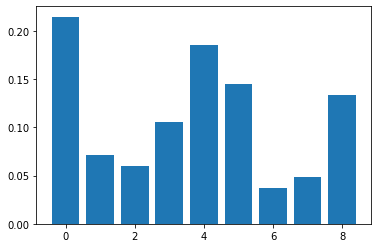

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [72]:
#Subset Data (Feature Selection)
df = df[['protocol_type', 'service', 'flag', 'count','srv_count','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_same_src_port_rate', 'attack_label']].copy()


In [73]:
#Split Dataset into Training-Testing Dataset
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.33)

In [74]:
#Train Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=False,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

None


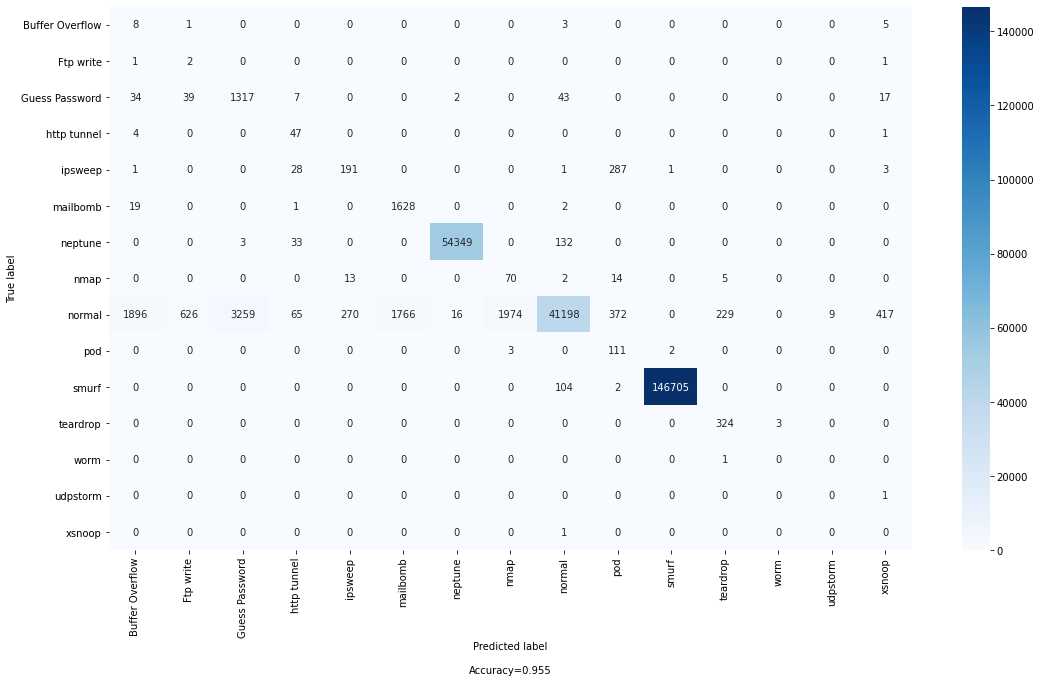

In [77]:
from sklearn.model_selection import cross_val_predict
y_train_pred = y_pred_over = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_train_pred)
print(make_confusion_matrix(cf = cm, categories=['Buffer Overflow', 'Ftp write', 'Guess Password', 'http tunnel', 'ipsweep', 'mailbomb', 'neptune', 'nmap', 'normal', 'pod', 'smurf' , 'teardrop', 'worm', 'udpstorm', 'xsnoop'] ,sum_stats = True, figsize = (18,10)))

In [78]:
#Accuracies on Each Class
cf = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cf.diagonal())
from sklearn.metrics import recall_score


[0.47058824 0.5        0.90267306 0.90384615 0.37304688 0.98666667
 0.99691839 0.67307692 0.7907941  0.95689655 0.99927798 0.99082569
 0.         0.         0.        ]


In [79]:
from collections import Counter

#Count amount of each class in test and training
counter = Counter(y_test)
print(counter)
counter_train  = Counter(y_train)
print(counter_train)

Counter({'smurf.': 146811, 'neptune.': 54517, 'normal.': 52097, 'mailbomb.': 1650, 'guess_passwd.': 1459, 'ipsweep.': 512, 'teardrop.': 327, 'pod.': 116, 'nmap.': 104, 'httptunnel.': 52, 'buffer_overflow.': 17, 'ftp_write.': 4, 'worm.': 1, 'udpstorm.': 1, 'xsnoop.': 1})
Counter({'smurf.': 298070, 'neptune.': 110685, 'normal.': 105774, 'mailbomb.': 3350, 'guess_passwd.': 2961, 'ipsweep.': 1041, 'teardrop.': 664, 'pod.': 235, 'nmap.': 211, 'httptunnel.': 106, 'buffer_overflow.': 35, 'ftp_write.': 7, 'xsnoop.': 3, 'worm.': 1, 'udpstorm.': 1})


In [80]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 

#Random Over Sampling to Duplicate
strategy = { 'xsnoop.': 6, 'worm.': 6, 'udpstorm.': 6}
oversample = RandomOverSampler(sampling_strategy= strategy)
X_train_over, y_train_over= oversample.fit_resample(X_train, y_train)

#SMOTE
strategy = {'nmap.': 60000, 'buffer_overflow.': 60000, 'ftp_write.': 60000, 'xsnoop.': 90000, 'worm.': 90000, 'udpstorm.': 90000}
oversample = SMOTE(sampling_strategy= strategy, k_neighbors=4)
X_train_over, y_train_over= oversample.fit_resample(X_train_over, y_train_over)


print(Counter(y_train_over))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Counter({'smurf.': 298070, 'neptune.': 110685, 'normal.': 105774, 'xsnoop.': 90000, 'worm.': 90000, 'udpstorm.': 90000, 'nmap.': 60000, 'buffer_overflow.': 60000, 'ftp_write.': 60000, 'mailbomb.': 3350, 'guess_passwd.': 2961, 'ipsweep.': 1041, 'teardrop.': 664, 'pod.': 235, 'httptunnel.': 106})


In [81]:
from sklearn.naive_bayes import GaussianNB
classifier_over = GaussianNB()
classifier_over.fit(X_train_over, y_train_over)

GaussianNB(priors=None, var_smoothing=1e-09)

None


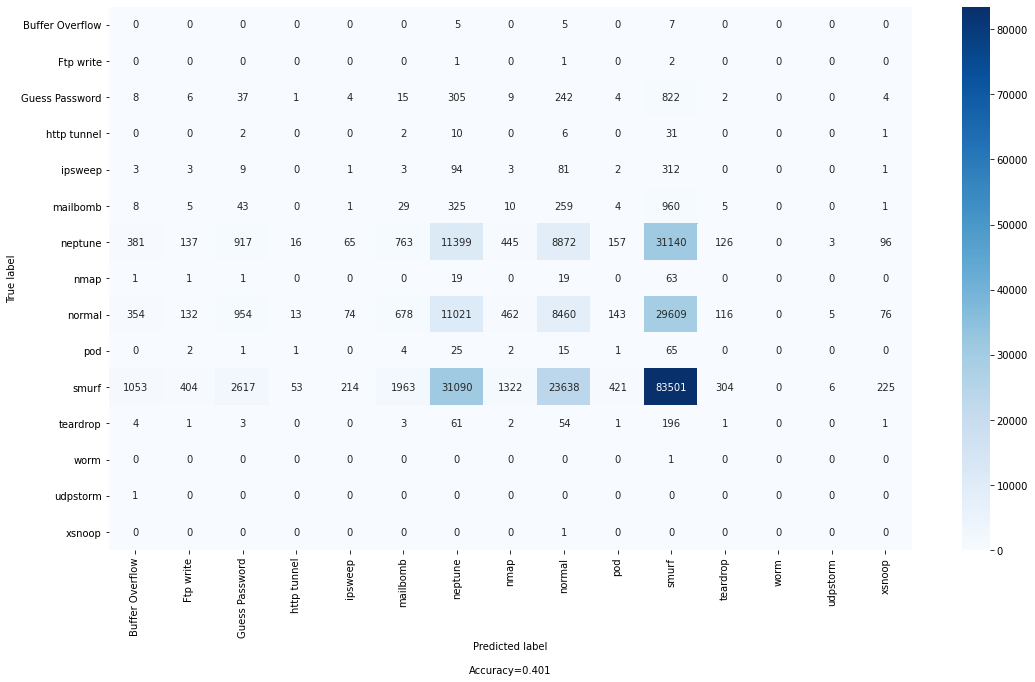

In [82]:
from sklearn.model_selection import cross_val_predict
y_pred_over = classifier_over.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_over = confusion_matrix(y_test, y_train_pred_over)
print(make_confusion_matrix(cf = cm_over, categories=['Buffer Overflow', 'Ftp write', 'Guess Password', 'http tunnel', 'ipsweep', 'mailbomb', 'neptune', 'nmap', 'normal', 'pod', 'smurf' , 'teardrop', 'worm', 'udpstorm', 'xsnoop'] ,sum_stats = True, figsize = (18,10)))

In [83]:
#Accuracies By Column
cf = cm_over.astype('float') / cm_over.sum(axis=1)[:, np.newaxis]
print(cf.diagonal())
from sklearn.metrics import recall_score


[0.         0.         0.02535984 0.         0.00195312 0.01757576
 0.20909074 0.         0.16238939 0.00862069 0.56876528 0.0030581
 0.         0.         0.        ]


In [48]:
#Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, y_pred_over,  average='weighted')
print('Precision: %.3f' % precision)
recall = recall_score(y_test, y_pred_over, average='weighted')
print('Recall: %.3f' % recall)
score = f1_score(y_test, y_pred_over, average='weighted')
print('F-Measure: %.3f' % score)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.988
Recall: 0.955
F-Measure: 0.967
